### Imports and Utility-Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%run ./library/traffic_simulation.py
%run ../utils/helper.py
%run /workspaces/jupyterlite/content/pytroch/arrays_and_matricies.py
# %run /workspaces/jupyterlite/content/algorithms/pytorch-traffic-simulation.py

In [2]:
def draw_lines_based_on_points_on_plot(points, ax=None, line_color='blue', line_size=0.5):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(points[:, 0], points[:, 1], color=line_color, linewidth=line_size)

    return ax

def draw_points_on_plot(point_sequence, ax, line_color, point_size=1):
    x, y = zip(*point_sequence)
    ax.scatter(x, y, color=line_color, s=point_size)
    return ax

In [3]:
def visualize_line_change_by_theta(line, theta):
    new_endpoint = calculate_rotated_line(line[0], line[1], theta)
    new_line = [line[1], new_endpoint]
    
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'r-', label='Original Line')

    # Plot the new line
    plt.plot([new_line[0][0], new_line[1][0]], [new_line[0][1], new_line[1][1]], 'b-', label='New Line')
    
    # Plotting points for clarity
    plt.scatter(*line[0], color='red', zorder=5)
    plt.scatter(*line[1], color='red', zorder=5)
    plt.scatter(*new_line[0], color='blue', zorder=5)
    plt.scatter(*new_line[1], color='blue', zorder=5)
    
    # Labeling the points
    plt.text(line[0][0], line[0][1], 'A', fontsize=12, ha='right')
    plt.text(line[1][0], line[1][1], 'B', fontsize=12, ha='right')
    plt.text(new_line[1][0], new_line[1][1], "B'", fontsize=12, ha='right')
    
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Visualizing Line Transformation')
    plt.show()


In [4]:
# a bit dirty. A good way to redraw
def redraw_initial_sketch():
    fig, ax = plt.subplots()
    ax.set_xlim(-30, 80)
    ax.set_ylim(-20, 70)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    
    angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
    rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
    init_point_sequence = [[0, 5], [1, 5]]
    point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
    ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')
    
    angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
    rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
    init_point_sequence = [[-0.5, 1], [0.5, 1]]
    point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
    ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

    return fig, ax

### Theory


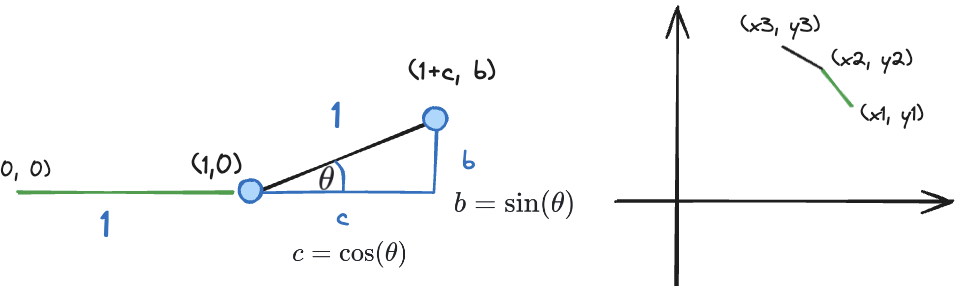
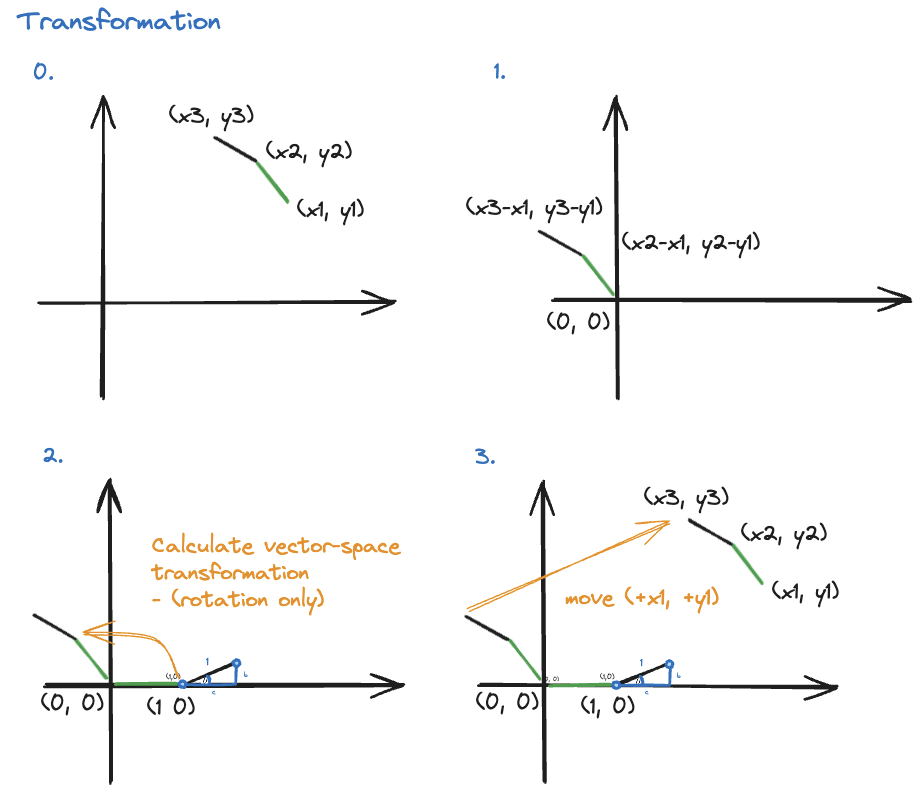

In [5]:
html(calculate_rotated_line)

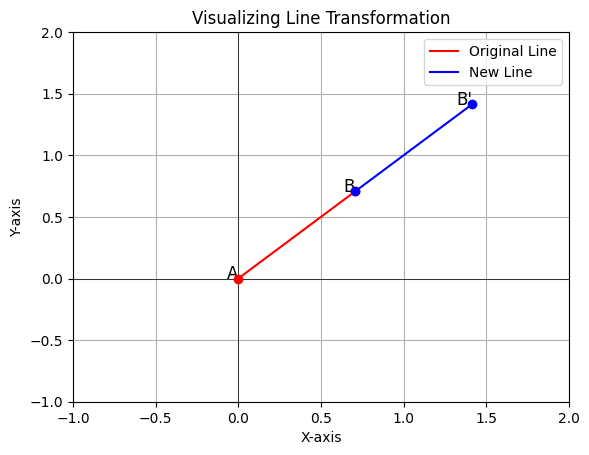

In [6]:
line = [[0, 0], [0.7071, 0.7071]]
theta = np.radians(0)
visualize_line_change_by_theta(line, theta)

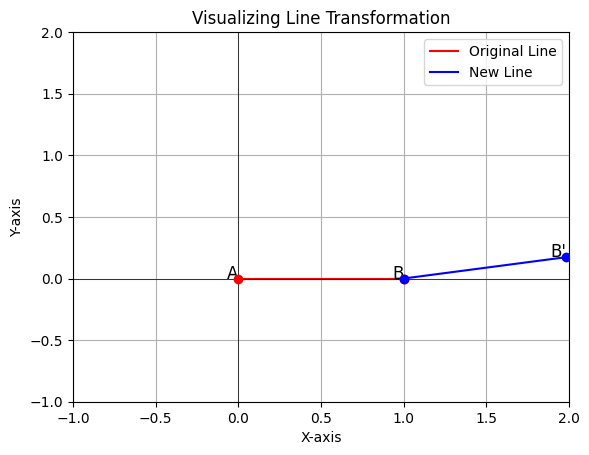

In [7]:
line = [[0, 0], [1, 0]]
theta = np.radians(10)
visualize_line_change_by_theta(line, theta)

### Streets-Building

In [8]:
def calc_roation_angles_from_tuple(angle_count_tuples):
    return np.radians(np.repeat([angle for angle, count in angle_count_tuples], [count for angle, count in angle_count_tuples]))

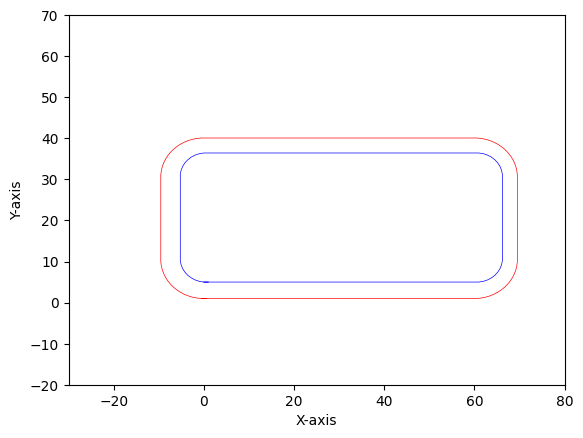

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(-30, 80)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-0.5, 1], [0.5, 1]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

plt.show()

### Car-Simulation

In [10]:
scatter_one = ax.scatter([], [], c='green', s=10)
scatter_two = ax.scatter([], [], c='orange', s=10)
time_scale = 5

def update(i):
    global ax, scatter_one, scatter_two, time_scale, point_sequence_one, point_sequence_two
    
    points_indices_one = np.mod(time_scale * np.array([2*i, i+20, i+50]), point_sequence_one.shape[0])
    points_indices_two = np.mod(time_scale * np.array([i+5, i+30, i+50]), point_sequence_two.shape[0])
    
    points_one = np.array([point_sequence_one[index] for index in points_indices_one])
    points_two = np.array([point_sequence_two[index] for index in points_indices_two])
    
    scatter_one.set_offsets(points_one)
    scatter_two.set_offsets(points_two)
    
    return scatter_one, scatter_two

ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

In [11]:
N = 1000000
time_scale = 1
indices = np.arange(N)

indices_1 = np.mod(time_scale * np.array([2*indices, indices+20, indices+50]), point_sequence_one.shape[0])
indices_2 = np.mod(time_scale * np.array([indices+5, indices+30, indices+50]), point_sequence_two.shape[0])

points_one = point_sequence_one[indices_1]
points_two = point_sequence_two[indices_2]

#### Torch-Operations

#### Add cars to lanes, Respect other cars, Change lane

#### Code

In [12]:
import torch

def fill_zero_places(a):
    """
    a = tensor([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    b = tensor([-1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0, 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0])
    nonzero_indices = tensor([ 0,  1,  6,  8, 14, 23])
    diff = tensor([1, 5, 2, 6, 9, 8])
    c = tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    d = tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
    """
    b = torch.cat([torch.tensor([-1], device=a.device), a])
    nonzero_indices = torch.nonzero(b).squeeze()
    diff = torch.diff(torch.cat([nonzero_indices, torch.tensor([b.shape[0]], device=b.device)]))
    c = b[nonzero_indices].repeat_interleave(diff)
    c[c < 0] = 0
    d = c[1:]
    
    return d

def shift_values_to_next_available_zero(a):
    """
    a = tensor([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    b = tensor([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    c = tensor([ 0,  1,  0,  0,  0,  0,  6,  0,  8,  0,  0,  0,  0,  0, 14,  0,  0,  0, 0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0])
    d = tensor([ 1,  0,  0,  0,  0,  6,  0,  8,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0, 0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0])
    e = tensor([ 0,  1,  1,  1,  1,  1,  6,  6,  8,  8,  8,  8,  8,  8, 14, 14, 14, 14, 14, 14, 14, 14, 14, 23, 23, 23, 23, 23, 23, 23])
    f = tensor([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    """
    b = (a > 0).int()
    b = torch.cat([torch.tensor([1], device=a.device), b])
    c = torch.arange(b.shape[0], device=a.device) * b
    d = c[1:]
    e = torch.roll(fill_zero_places(d), 1)
    e[0] = 0
    f = torch.zeros_like(a)
    f.scatter_add_(0, e.long(), a)
        
    return f

def fill_zero_values_ascending_rest_with_zero(a):
    """
    a = tensor([4, 3, 2, 1, 0, 1, 0, 5, 4, 3, 2, 1, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 4, 3, 2, 1, 0, 0])
    b = tensor([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=torch.int32)
    c = tensor([0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 7])
    d = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2])
    """
    b = (a > 0).int()
    c = torch.cumsum(1 - b, dim=0)
    d = (c * (1 - b) - torch.maximum(b * c, torch.zeros_like(c)).cummax(dim=0)[0]) * (1 - b)
    
    return d

def find_one_zero_pattern(a):
    """
    a = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
    b = tensor([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=torch.int32)
    c = tensor([ 0,  0,  0, -1,  1, -1,  1,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0, 0,  0, -1,  1, -1,  1,  0,  0,  0,  0,  0, -1], dtype=torch.int32)
    d = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
    """
    b = torch.roll(a.int(), -1)
    b[-1] = 1
    c = a - b
    d = (c == 1).int()
    
    return d

def fill_zero_values_descending_rest_with_zero(a):
    b = fill_zero_values_ascending_rest_with_zero(a)
    c = (b > 0).int()
    d = find_one_zero_pattern(c)
    e = d * b
    f = shift_values_to_next_available_zero(e)
    g = fill_zero_places(f)
    h = ((g + 1) - b) * c
    
    return h

def fill_zero_values_descending_rest_with_zero(a):
    """
    a = tensor([4, 3, 2, 1, 0, 1, 0, 5, 4, 3, 2, 1, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 4, 3, 2, 1, 0, 0])
    b = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2])
    c = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=torch.int32)
    d = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
    e = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
    f = tensor([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    g = tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
    h = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])
    """
    b = fill_zero_values_ascending_rest_with_zero(a)
    c = (b > 0).int()
    d = find_one_zero_pattern(c)
    e = d * b
    f = shift_values_to_next_available_zero(e)
    g = fill_zero_places(f)
    h = ((g + 1) - b) * c
    
    return h

def find_values_that_must_be_reordered(a):
    """
    a = tensor([ 3, 10,  8, 11,  5, 13,  7, 14, 18, 15, 19, 20, 13, 21, 16, 24, 19, 24, 23, 22, 28, 22, 27, 26, 33, 32, 30, 32, 31, 36])
    b = tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
    c = tensor([2, 8, 5, 7, 0, 7, 0, 6, 9, 5, 8, 8, 0, 7, 1, 8, 2, 6, 4, 2, 7, 0, 4, 2, 8, 6, 3, 4, 2, 6])
    d = tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 6])
    e = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=torch.int32)
    f = tensor([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=torch.int32)
    """
    b = torch.arange(1, a.shape[0] + 1)
    c = a - b
    d, _ = torch.cummin(c.flip(0), dim=0)
    d = d.flip(0)
    e = (c == d).int()
    f = 1 - e

    return f

def adjust_cars_no_lane_change(a):
    """
    a = tensor([ 3, 10,  8, 11,  5, 13,  7, 14, 18, 15, 19, 20, 13, 21, 16, 24, 19, 24, 23, 22, 28, 22, 27, 26, 33, 32, 30, 32, 31, 36, -1, -1])
    b = tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=torch.int32)
    c = tensor([4, 3, 2, 1, 0, 1, 0, 5, 4, 3, 2, 1, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 4, 3, 2, 1, 0, 0, 1, 0])
    d = tensor([ 0,  0,  0,  0,  5,  0,  7,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0, 0,  0,  0, 22,  0, 26,  0,  0,  0,  0, 31, 36, 0, -1])
    e = tensor([ 5,  0,  0,  0,  0,  7,  0, 13,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0, 0,  0,  0,  0, 26,  0, 31,  0,  0,  0,  0, 36, -1, 0])
    f = tensor([ 5,  5,  5,  5,  5,  7,  7, 13, 13, 13, 13, 13, 13, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 26, 31, 31, 31, 31, 31, 36, 0, 0])
    g = tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 36])
    """

    b = 1 - find_values_that_must_be_reordered(a)
    # Extend a and b with dummy-values to cover the cases where no car has to be reordered without throwing an error
    a = torch.cat([a, torch.tensor([-1, -1])])
    b = torch.cat([b, torch.tensor([0, 1])])
    c = fill_zero_values_descending_rest_with_zero(b)
    d = a * b
    e = shift_values_to_next_available_zero(d)
    f = fill_zero_places(e)
    g = f[:-2] - c[:-2]

    return g

def mapping_max_values_to_prev_lanes(cars):
    """
    - two lanes
    """
    max_values_per_lane = maximum_value_by_grp(cars, 0, 1)
    mapping_max_values_per_lane = torch.clone(max_values_per_lane)
    mapping_max_values_per_lane[1:, 1] = mapping_max_values_per_lane[:-1, 1]
    mapping_max_values_per_lane[0, 1] = 0

    return mapping_max_values_per_lane

#### Speed-Up

In [13]:
def indicies_where_the_value_changes(a):
    """
    question: has value of position i a different value then position i-1?
    - the edge case for the first position is decidided as True
    
    a = tensor([0, 0, 0, 1, 0, 2, 0, 3])
    b = tensor([ 0,  0,  1, -1,  2, -2,  3])
    c = tensor([ True, False, False,  True,  True,  True,  True,  True])
    d = tensor([0, 3, 4, 5, 6, 7])
    """
    b = a[1:,] - a[:-1]
    c = (b != 0)
    c = torch.cat([torch.tensor([True]), c])
    d = (c==True).nonzero(as_tuple=True)[0]

    return d

def put_slowest_car_infront(cars, track_sizes, grp_idx = 0, val_idx = 1):
    """
    asserts that cars are sorted by grp_idx
    """
    # put the lowest cars of each lane infront of the top car
    indicies_slowest_cars = indicies_where_the_value_changes(cars[:, grp_idx])
    used_lanes = torch.unique(cars[:, grp_idx])
    slowest_cars = cars[indicies_slowest_cars]
    track_sizes_used_lanes = filter_columns_based_on_tensor(track_sizes, used_lanes)
    slowest_cars[:, val_idx] = slowest_cars[:, val_idx] + track_sizes_used_lanes[:, val_idx]
    cars_with_slowest_car_infront = torch.cat([cars, slowest_cars])
    indicies_of_artifical_cars = torch.cat([indicies_slowest_cars[1:], torch.tensor([cars.shape[0]])]) + torch.arange(0, indicies_slowest_cars.shape[0])
    mask_valid_cars = torch.ones(cars_with_slowest_car_infront.shape[0], dtype=torch.bool)
    mask_valid_cars[indicies_of_artifical_cars] = False
    cars_with_slowest_car_infront_sorted = sort_matrix_by_nth_and_mth_column(cars_with_slowest_car_infront, grp_idx, val_idx)
    
    return cars_with_slowest_car_infront, mask_valid_cars

def cars_index_with_track_mod(cars, track_sizes):
    mod_for_cars = track_sizes[(cars[:, 0][..., None] == track_sizes[:, 0]).nonzero(as_tuple=True)[1]]
    cars_with_indicies_mod_track = torch.clone(cars)
    cars_with_indicies_mod_track[:, 1] = torch.remainder(cars[:, 1], mod_for_cars[:, 1])[:]

    return cars_with_indicies_mod_track

def eligible_for_takeover(a, mods, val_idx=1):
    """
    - two lane case
    - all cars with their original indicies (no adjustment to put them in one lane)
    - those cars where the index occurs twice cannot change the lane

    -- outdated --
    a = torch.tensor([[0, 1, 4], [0, 2, 3], [0, 3, 5], [1, 2, 3], [1, 3, 7], [0, 4, 3], [1, 10, 1], [1, 11, 3], [0, 9, 5], [0, 10, 3]], dtype=torch.float)
    b = tensor([0, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=torch.int32)
    c = tensor([0, 1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=torch.int32)
    d = tensor([0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=torch.int32)
    e = tensor([1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=torch.int32)
    """
    a_mod = torch.clone(a)
    a_mod[:, 1] = cars_index_with_track_mod(a, mods)[:, 1]
    sorted_matrix = sort_matrix_by_nth_entry(a_mod, val_idx)
    b = (sorted_matrix[:, val_idx] - torch.cat([sorted_matrix[1:, val_idx], torch.tensor([sorted_matrix[-2, val_idx]])]) == 0).int()
    c = torch.roll(b, 1) | b
    d = reverse_sort_matrix_by_nth_entry(a, c)
    e = 1 - d
    
    return e

def cars_desiring_takeover(cars, track_sizes, grp_idx = 0, val_idx = 1, speed_idx = 2):
    """
    - two lane case
    - all cars with their original indicies (no adjustment to put them in one lane)
    - respect the last car of a track when using modulo-tracks

    returns:
     - original_cars_to_overtake: positions of cars (in their original index) which try to overtake
    """
    # Sort cars (since some cars might have changed the lane)
    cars_sorted = sort_matrix_by_nth_and_mth_column(cars)
    # mask_valid_cars works for sorted arrays
    cars_with_slowest_cars_infront, mask_valid_cars = put_slowest_car_infront(cars_sorted, track_sizes)
    
    # Put all cars in one lane
    max_values_per_lane = mapping_max_values_to_prev_lanes(cars_with_slowest_cars_infront)
    cars_in_single_lane = add_to_matrix_mapping_values(cars_with_slowest_cars_infront, max_values_per_lane)

    # Fit order cars, Update the cars
    cars_update_sorted = sort_matrix_by_nth_and_mth_column(cars_in_single_lane)
    cars_update_sorted[:, 1] += cars_update_sorted[:, 2]
    
    # Based on the cars in their respective groups, which are the ones that try to overtake?
    updated_cars_to_overtake = find_values_that_must_be_reordered(cars_update_sorted[:, 1])
    cars_to_overtake = reverse_sort_matrix_by_nth_and_mth_column(cars_in_single_lane, updated_cars_to_overtake)
    no_sort_mask_valid_cars = reverse_sort_matrix_by_nth_and_mth_column(cars_in_single_lane, mask_valid_cars)
    
    original_cars_to_overtake = reverse_sort_matrix_by_nth_and_mth_column(cars, cars_to_overtake[no_sort_mask_valid_cars])
    
    return original_cars_to_overtake

def cars_that_overtake(cars, track_sizes):
    cars_that_might_overtake = cars_desiring_takeover(cars, track_sizes) & eligible_for_takeover(cars, track_sizes)
    prob_that_cars_overtake = cars_that_might_overtake * cars[:, 3]
    cars_that_overtake = (prob_that_cars_overtake > torch.rand(prob_that_cars_overtake.shape[0]))
    
    return cars_that_overtake

def update_cars(cars, track_sizes):
    """
    - two car lanes
    """
    cars_sorted = sort_matrix_by_nth_and_mth_column(cars)
    cars_that_change_lane = cars_that_overtake(cars_sorted, track_sizes)
    updated_cars = update_cars_with_lane_changes(cars, track_sizes, cars_that_change_lane)

    return updated_cars

In [35]:
def update_cars_with_lane_changes(cars, track_sizes, cars_changing_lanes):
    # updat the car lanes and fit the cars
    cars_sorted_and_lanes_update = track_offset_from_slowest_cars(cars, track_sizes, cars_changing_lanes)
    
    # Sort cars (since some cars might have changed the lane)
    cars_sorted = sort_matrix_by_nth_and_mth_column(cars_sorted_and_lanes_update)
    cars_with_slowest_cars_infront, mask_valid_cars = put_slowest_car_infront(cars_sorted, track_sizes)

    # Put all cars in one lane
    max_values_per_lane = mapping_max_values_to_prev_lanes(cars_with_slowest_cars_infront)
    cars_in_single_lane = add_to_matrix_mapping_values(cars_with_slowest_cars_infront, max_values_per_lane)

    # Update the cars and sort for adjust_cars_no_... as well as to use the mask mask_valid_cars
    cars_update_in_lane_sorted = sort_matrix_by_nth_and_mth_column(cars_in_single_lane)
    # either drive or change lane
    no_drive_while_lanechange = torch.ones(cars_update_in_lane_sorted.shape[0])
    no_drive_while_lanechange[mask_valid_cars] = 1 - cars_changing_lanes.float()
    cars_update_in_lane_sorted[:, 1] += cars_update_in_lane_sorted[:, 2] * no_drive_while_lanechange
    
    # Adjust the cars, such that they could fit into one lane (to execute adjust_cars_no_lane_change)
    cars_update_in_lane_sorted[:, 1] = adjust_cars_no_lane_change(cars_update_in_lane_sorted[:, 1])
    
    # Remove the lane offset and put the cars to the original index
    neg_max_values_per_lane = torch.clone(max_values_per_lane)
    neg_max_values_per_lane[:, 1] = - neg_max_values_per_lane[:, 1]
    cars_update_multi_lane = add_to_matrix_mapping_values(cars_update_in_lane_sorted, neg_max_values_per_lane)

    return cars_update_multi_lane[mask_valid_cars]

In [36]:
def track_offset_from_slowest_cars(cars, track_sizes, cars_changing_lanes):
    cars_sorted = sort_matrix_by_nth_and_mth_column(cars)

    # calculate the slowest car in each lane
    indicies_of_slowest_cars = indicies_where_the_value_changes(cars_sorted[:, 0])
    mod_for_cars = track_sizes[(cars_sorted[:, 0][..., None] == track_sizes[:, 0]).nonzero(as_tuple=True)[1]]
    num_of_rounds = torch.div(cars_sorted[:, 1], mod_for_cars[:, 1], rounding_mode="trunc")
    cars_rounds_as_distance = num_of_rounds * mod_for_cars[:, 1]
    
    slowest_cars = cars_sorted[indicies_of_slowest_cars]
    slowest_cars_neg_offsets = torch.column_stack([slowest_cars[:, 0], -cars_rounds_as_distance[indicies_of_slowest_cars]])
    slowest_cars_offsets = torch.column_stack([slowest_cars[:, 0], cars_rounds_as_distance[indicies_of_slowest_cars]])

    # update lanes
    cars_sorted[:, 0] += cars_changing_lanes
    cars_sorted[:, 0] = torch.remainder(cars_sorted[:, 0], 2)
    
    # set the slowest cars to be at 0, then do modulo and put the cars back
    # the distance between slowest and fastes car is always less then the lane distance
    cars_sorted[:, 1] = add_to_matrix_mapping_values(cars_sorted[:, :2], slowest_cars_neg_offsets)[:, 1]
    cars_sorted[:, 1] = cars_index_with_track_mod(cars_sorted[:, :2], track_sizes)[:, 1]
    cars_sorted[:, 1] = add_to_matrix_mapping_values(cars_sorted[:, :2], slowest_cars_offsets)[:, 1]
    
    return cars_sorted

In [59]:
car_count = 500
len_track = point_sequence_one.shape[0]
cars_track = torch.randint(0, 2, (car_count,))
cars_position = torch.arange(0, len_track)[torch.randint(0, len_track, (car_count,))]
cars_speed = torch.randint(1, 30, (car_count,))
chance_for_takeover = torch.rand(car_count) / 4
cars_id = torch.arange(0, car_count)
cars = torch.column_stack([cars_track, cars_position, cars_speed, chance_for_takeover, cars_id])
cars = sort_matrix_by_nth_and_mth_column(cars)
# cars

# # lane-id, lane-idx, speed, prob.-lane-change, unique-id
# cars = torch.tensor([[0, 1, 4, 0.1, 1], [0, 2, 3, 0.1, 2], [0, 3, 5, 0.1, 3], [1, 4, 3, 0.1, 4], [1, 5, 7, 0.1, 5], [0, 6, 3, 0.1, 6], [1, 10, 1, 0.1, 7], [1, 11, 3, 0.1, 8], [0, 13, 5, 0.1, 9], [0, 14, 3, 0.1, 10]], dtype=torch.float)
# cars = sort_matrix_by_nth_and_mth_column(cars)

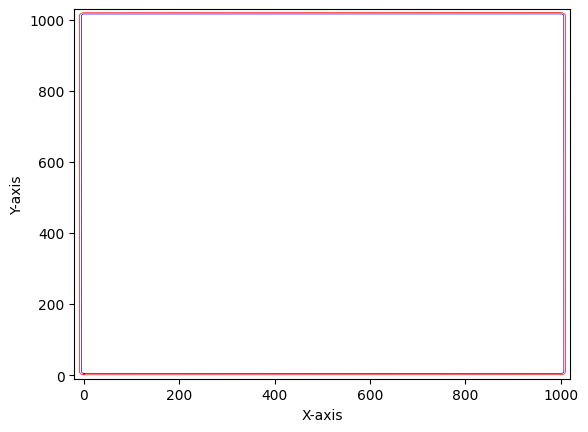

In [66]:
x_length = 1000
fig, ax = plt.subplots()
ax.set_xlim(-20, x_length + 20)
ax.set_ylim(-10, x_length + 30)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, x_length], [10, 9], [0, x_length], [10, 9], [0, x_length], [10, 9], [0, x_length], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, x_length], [6, 15], [0, x_length], [6, 15], [0, x_length], [6, 15], [0, x_length], [6, 15]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-0.5, 1], [0.5, 1]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

plt.show()

In [63]:
# both tracks must be the same length to avoid weird behavior
track_sizes = torch.tensor([[0., point_sequence_one.shape[0]], [1., point_sequence_one.shape[0]]])
iterations = 500

points_indices_one_list = []
points_indices_two_list = []

# visualize updates
for _ in range(iterations):
    proportional_difference_lanes = point_sequence_two.shape[0] / point_sequence_one.shape[0]

    cars = update_cars(cars, track_sizes)
    cars_on_lane_one = cars[cars[:, 0] == 0]
    cars_on_lane_two = cars[cars[:, 0] == 1]

    points_indices_one_list.append(torch.remainder(cars_on_lane_one[:, 1], point_sequence_one.shape[0]))
    points_indices_two_list.append(torch.remainder(proportional_difference_lanes * cars_on_lane_two[:, 1], point_sequence_two.shape[0]))

In [67]:
scatter_one = ax.scatter([], [], c='green', s=10)
scatter_two = ax.scatter([], [], c='orange', s=10)

def update(i):
    global ax, scatter_one, scatter_two, point_sequence_one, point_sequence_two

    if points_indices_one_list[i].shape[0] != 0:
        points_indices_one = points_indices_one_list[i]
        points_one = np.array([point_sequence_one[int(index)] for index in points_indices_one])
        scatter_one.set_offsets(points_one)

    if points_indices_two_list[i].shape[0] != 0:
        points_indices_two = points_indices_two_list[i]
        points_two = np.array([point_sequence_two[int(index)] for index in points_indices_two])
        scatter_two.set_offsets(points_two)
    
    return scatter_one, scatter_two

ani = FuncAnimation(fig, update, frames=range(iterations), repeat=True, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

### Recording form fixed-car

### Recording from

### Replay from Recording